In [98]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Distribution of Sample Mean ~ N(mu, variance???)

In [14]:
np.random.seed(1)
mu = 10
sigma = 2
population = np.random.normal(loc=mu, scale=sigma, size=10000)

In [65]:
n = 50
sample = pd.Series(population).sample(n)
xbar = sample.mean()
mu, xbar

(10, 9.838663404917684)

In [66]:
# sigma is known
sigma_xbar = sigma/np.sqrt(n)
xbar - 1.96*sigma_xbar, xbar+1.96*sigma_xbar

(9.28429168846743, 10.393035121367937)

In [67]:
sigma_xbar

0.282842712474619

In [72]:
# sigma is unknown
sigma_bar = sample.std() # get back on this
sigma_xbar = sigma_bar / np.sqrt(n)
sigma_xbar

0.24821135738257544

In [69]:
dof = n - 1
t_dist = st.t(dof)
critical_value = abs(t_dist.ppf(0.025))
critical_value

2.0095752344892093

In [70]:
xbar - critical_value*sigma_xbar, xbar+critical_value*sigma_xbar

(9.33986400820271, 10.337462801632658)

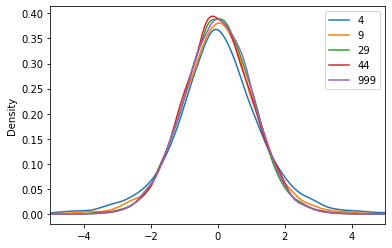

In [79]:
for n in [5, 10, 30, 45, 1000]:
    dof = n - 1
    sample = np.random.standard_t(df=dof)
    sample = pd.Series(sample)
    sample.plot.kde(xlim=(-5,5))
plt.legend([5-1, 10-1, 30-1, 45-1, 999])

In [89]:
for n in range(2,10):
    dof = n - 1
    t_dist = st.t(dof)
    print(dof, abs(t_dist.ppf(0.005)))

1 63.65674116287404
2 9.924843200918074
3 5.840909299756432
4 4.604094871415898
5 4.032142983557536
6 3.7074280213249073
7 3.499483297350504
8 3.3553873313333966


### Hypothesis testing

In [90]:
url = 'https://raw.githubusercontent.com/skathirmani/datasets/master/HR%20Analytics.csv'
employees = pd.read_csv(url)
employees.shape

(1470, 35)

In [91]:
employees[['Gender', 'MonthlyIncome']].head()

,Gender,MonthlyIncome
0,Female,5993
1,Male,5130
2,Male,2090
3,Female,2909
4,Male,3468


In [95]:
females = employees[employees['Gender'] == 'Female']['MonthlyIncome']
males = employees[employees['Gender'] == 'Male']['MonthlyIncome']
females.mean()- males.mean()

306.05839002267567

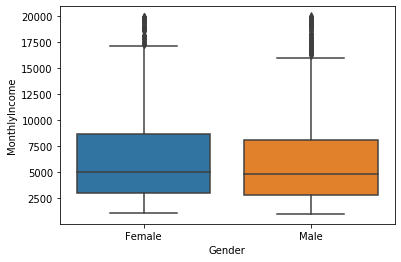

In [99]:
sns.boxplot(data=employees, x='Gender', y='MonthlyIncome')

In [ ]:
## Probability & Statistics For Engineers 
# Author: Miller & Freund